In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv("IDS.csv")

In [4]:
df = df[~df['Label'].isin(['DoS_SlowHTTPTest', 'Infiltration'])]

In [5]:
encoder = LabelEncoder()
df['LabelEncoded'] = encoder.fit_transform(df['Label'])

In [6]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,LabelEncoded
0,8080,6,10488,3,4,326,129.0,326,0,108.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,1
2,22817,6,85957169,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,86000000.0,0.0,86000000.0,86000000.0,Benign,0
3,22,6,373685,22,22,1928,2665.0,640,0,87.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH_BruteForce,7
4,80,6,16128,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS_HOIC,2
6,8080,6,512,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504503,80,6,2320,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_Hulk,5
504504,21,6,1,1,1,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP_BruteForce,6
504505,80,6,1756035,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS_LOIC_HTTP,3
504506,80,6,6268925,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,6268925.0,0.0,6268925.0,6268925.0,DDoS_LOIC_HTTP,3


In [7]:
df['Label'].value_counts()

Label
Benign            63000
Bot               50000
SSH_BruteForce    50000
DDoS_HOIC         50000
DoS_Hulk          50000
FTP_BruteForce    50000
DDoS_LOIC_HTTP    50000
DoS_GoldenEye     41508
Name: count, dtype: int64

In [8]:
df['LabelEncoded'].value_counts()

LabelEncoded
0    63000
1    50000
7    50000
2    50000
5    50000
6    50000
3    50000
4    41508
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404508 entries, 0 to 504507
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           404508 non-null  int64  
 1   Protocol           404508 non-null  int64  
 2   Flow Duration      404508 non-null  int64  
 3   Tot Fwd Pkts       404508 non-null  int64  
 4   Tot Bwd Pkts       404508 non-null  int64  
 5   TotLen Fwd Pkts    404508 non-null  int64  
 6   TotLen Bwd Pkts    404508 non-null  float64
 7   Fwd Pkt Len Max    404508 non-null  int64  
 8   Fwd Pkt Len Min    404508 non-null  int64  
 9   Fwd Pkt Len Mean   404508 non-null  float64
 10  Fwd Pkt Len Std    404508 non-null  float64
 11  Bwd Pkt Len Max    404508 non-null  int64  
 12  Bwd Pkt Len Min    404508 non-null  int64  
 13  Bwd Pkt Len Mean   404508 non-null  float64
 14  Bwd Pkt Len Std    404508 non-null  float64
 15  Flow Byts/s        404508 non-null  int64  
 16  Flow Pk

In [10]:
X = df.drop(columns=['Label', 'LabelEncoded']).values
y = df['LabelEncoded'].values

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=42)

In [13]:
unique, counts = np.unique(y, return_counts=True)
count_dict = dict(zip(unique, counts))
print(f"Distribution of y : {count_dict}")

unique, counts = np.unique(y_train, return_counts=True)
count_dict = dict(zip(unique, counts))
print(f"Distribution of y train : {count_dict}")

unique, counts = np.unique(y_val, return_counts=True)
count_dict = dict(zip(unique, counts))
print(f"Distribution of y train : {count_dict}")

unique, counts = np.unique(y_test, return_counts=True)
count_dict = dict(zip(unique, counts))
print(f"Distribution of y train : {count_dict}")

Distribution of y : {0: 63000, 1: 50000, 2: 50000, 3: 50000, 4: 41508, 5: 50000, 6: 50000, 7: 50000}
Distribution of y train : {0: 50400, 1: 40000, 2: 40000, 3: 40000, 4: 33206, 5: 40000, 6: 40000, 7: 40000}
Distribution of y train : {0: 6300, 1: 5000, 2: 5000, 3: 5000, 4: 4151, 5: 5000, 6: 5000, 7: 5000}
Distribution of y train : {0: 6300, 1: 5000, 2: 5000, 3: 5000, 4: 4151, 5: 5000, 6: 5000, 7: 5000}


In [14]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64)

In [15]:
class Hybrid_CNN_LSTM_Classifier(nn.Module):
    def __init__(self, feature_dim, num_classes, hidden_size=64):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # shape: (B, 1, F)
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.permute(0, 2, 1)  # shape: (B, T, C)
        lstm_out, _ = self.lstm(x)
        last_out = lstm_out[:, -1, :]
        return self.classifier(last_out)  # shape: (B, num_classes)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 8
model = Hybrid_CNN_LSTM_Classifier(feature_dim=X_train.shape[1], num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [17]:
# Tracking
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

best_val_loss = float('inf')
best_val_acc = 0
best_epoch = 0
patience = 10
epochs_no_improve = 0
n_epochs = 20

for epoch in range(n_epochs):
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device).long() 
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == yb).sum().item()
        total_train += yb.size(0)

    train_acc = correct_train / total_train
    avg_train_loss = total_loss / len(train_loader)

    train_loss_history.append(avg_train_loss)
    train_acc_history.append(train_acc)

    # === Validation ===
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device).long()
            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct_val += (preds == yb).sum().item()
            total_val += yb.size(0)

    val_acc = correct_val / total_val
    avg_val_loss = val_loss / len(val_loader)

    val_loss_history.append(avg_val_loss)
    val_acc_history.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f} | "
          f"Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

    # Early stopping based on validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        epochs_no_improve = 0
        torch.save(model.state_dict(), "model_hybrid_cnn_lstm.pt")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"⏹️ Early stopping at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(torch.load("model_hybrid_cnn_lstm.pt"))
print(f"\n✅ Best model loaded from epoch {best_epoch} with Val Accuracy = {best_val_acc:.4f}")

Epoch 1: Train Loss=0.4065, Train Acc=0.8766 | Val Loss=0.0504, Val Acc=0.9894
Epoch 2: Train Loss=0.0480, Train Acc=0.9892 | Val Loss=0.0209, Val Acc=0.9938
Epoch 3: Train Loss=0.0241, Train Acc=0.9944 | Val Loss=0.0129, Val Acc=0.9966
Epoch 4: Train Loss=0.0155, Train Acc=0.9965 | Val Loss=0.0088, Val Acc=0.9980
Epoch 5: Train Loss=0.0143, Train Acc=0.9967 | Val Loss=0.0084, Val Acc=0.9984
Epoch 6: Train Loss=0.0100, Train Acc=0.9977 | Val Loss=0.0082, Val Acc=0.9979
Epoch 7: Train Loss=0.0085, Train Acc=0.9980 | Val Loss=0.0058, Val Acc=0.9986
Epoch 8: Train Loss=0.0067, Train Acc=0.9984 | Val Loss=0.0057, Val Acc=0.9988
Epoch 9: Train Loss=0.0061, Train Acc=0.9986 | Val Loss=0.0060, Val Acc=0.9984
Epoch 10: Train Loss=0.0052, Train Acc=0.9988 | Val Loss=0.0044, Val Acc=0.9990
Epoch 11: Train Loss=0.0049, Train Acc=0.9989 | Val Loss=0.0044, Val Acc=0.9990
Epoch 12: Train Loss=0.0044, Train Acc=0.9990 | Val Loss=0.0042, Val Acc=0.9992
Epoch 13: Train Loss=0.0041, Train Acc=0.9991 | V

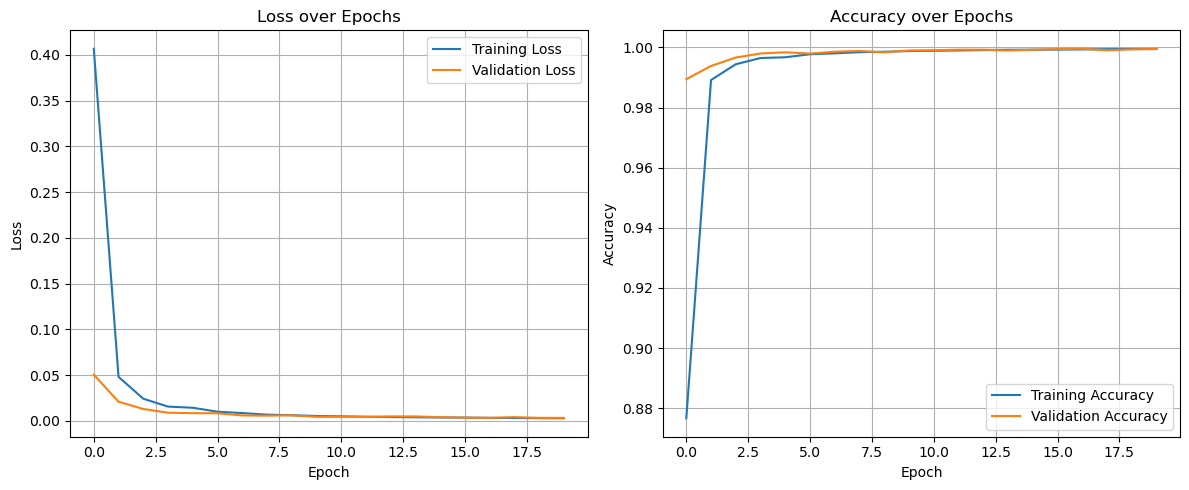

In [18]:
# --- Training Curve Plot ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

✅ Accuracy: 0.9997
📋 Classification Report:
               precision    recall  f1-score   support

         0.0     0.9998    0.9986    0.9992      6300
         1.0     0.9998    1.0000    0.9999      5000
         2.0     1.0000    1.0000    1.0000      5000
         3.0     0.9988    0.9998    0.9993      5000
         4.0     0.9995    0.9998    0.9996      4151
         5.0     0.9998    0.9998    0.9998      5000
         6.0     1.0000    1.0000    1.0000      5000
         7.0     0.9998    1.0000    0.9999      5000

    accuracy                         0.9997     40451
   macro avg     0.9997    0.9997    0.9997     40451
weighted avg     0.9997    0.9997    0.9997     40451



C:\Users\doan-\AppData\Local\Temp\ipykernel_16980\3898431566.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\doan-\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


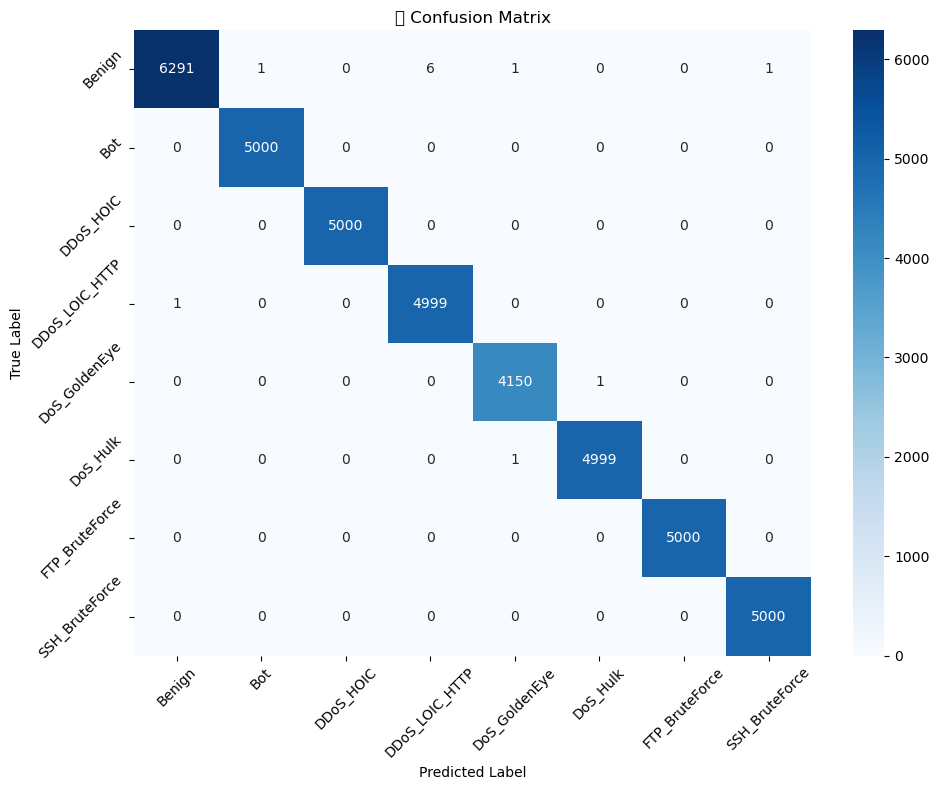

In [19]:
# === Collect predictions ===
model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for xb, yb in test_loader: 
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu()
        all_preds.append(preds)
        all_true.append(yb.cpu())

y_pred = torch.cat(all_preds).numpy()
y_true = torch.cat(all_true).numpy()

# === Basic metrics ===
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.4f}")
print("📋 Classification Report:\n", classification_report(y_true, y_pred, digits=4))

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)

# === Class labels ===
labels = ['Benign', 'Bot', 'DDoS_HOIC', 'DDoS_LOIC_HTTP', 'DoS_GoldenEye', 'DoS_Hulk', 'FTP_BruteForce', 'SSH_BruteForce']

# === Plot ===
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('📊 Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()